In [ ]:
import pandas as pd # important library 
import matplotlib.pyplot as plt #for us to work with the data visualization
import seaborn as sns
import numpy as np # to work with the mathematics part
# We want our plots to appear in the notebook
%matplotlib inline 


In [ ]:
df_shill_bidding = pd.read_csv("Shill Bidding Dataset.csv")

In [ ]:
df_shill_bidding.head(10)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


### Attribute Information:

* Record ID: Unique identifier of a record in the dataset.
* Auction ID: Unique identifier of an auction.
* Bidder ID: Unique identifier of a bidder.
* Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.
* Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
* Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
* Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.
* Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
* Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
* Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
* Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.
* Auction Duration: How long an auction lasted.
* Class: 0 for normal behaviour bidding; 1 for otherwise.

In [ ]:
# We can observe that we have 6321 entries with 13 features
df_shill_bidding.shape

(6321, 13)

In [ ]:
# We can use the code below to check information about the dataset like, number of features, type of the entries, the size of the data set , the number of columns and also the names of the columns.
df_shill_bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [ ]:
#With the code below we can check if we have any entry with missing values
df_shill_bidding.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

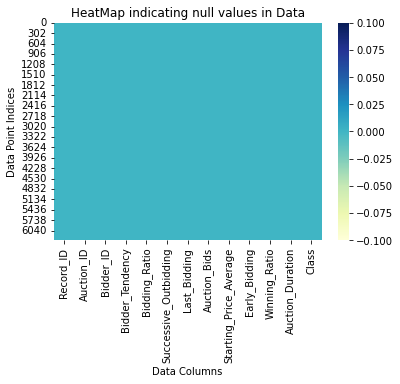

In [ ]:
#We could also use a graphic visualization to find out if there is any missing valus on the dataset. If there was any missing values we would be able  to see some other colours on the graph below.
sns.heatmap(df_shill_bidding.isnull(), cmap= "YlGnBu");
plt.title("HeatMap indicating null values in Data")
plt.ylabel("Data Point Indices")
plt.xlabel("Data Columns")
plt.show()

In [ ]:
# Now we will use the function describe()
df_shill_bidding.describe().T

,count,mean,std,min,25%,50%,75%,max
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.000000
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000


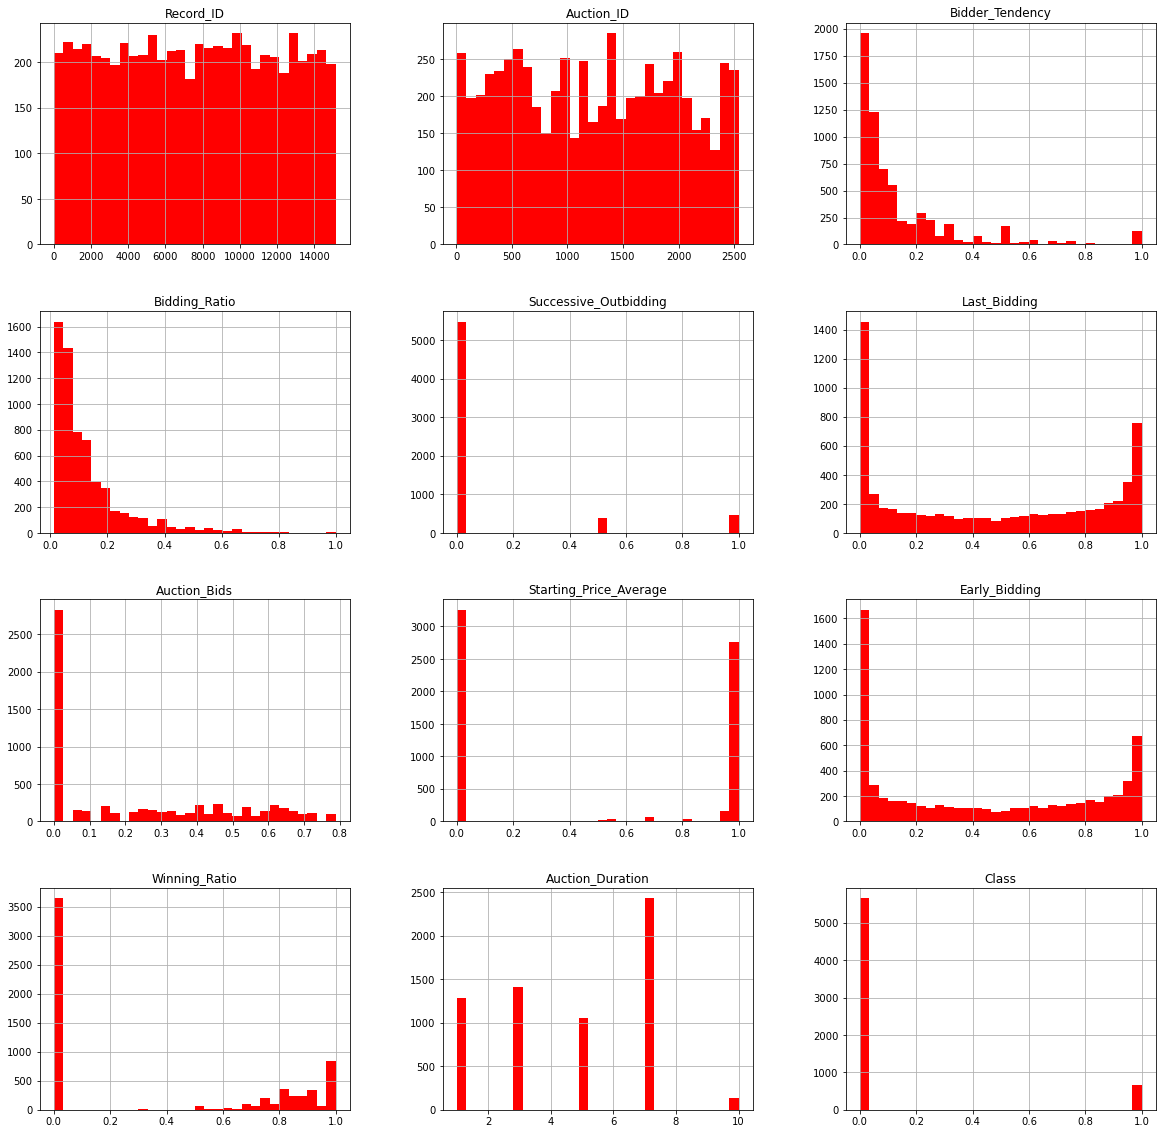

In [ ]:
df_shill_bidding.hist(bins=30, figsize=(20,20), color='r');

#### By looking at this histogram we can start to see some patterns on the data set. For example, the auction_bids feature shows us that the majority of bids are concentrated on the beginning of the auction. Acoording to the data dictionary above, this is explained by the fact that auctions with Shill Bidding activities tend to have a much higher number of bids than the average of bids in concurrent auctions. That behaviour along with the next histogram of the Starting_price_average already shows some indicators of a shill bidd. As we can see the average starting price is closer to zero, which means that this type of bid starts to be very suspicious, since they bid slow amounts right at the begining of the auction. 
#### Another feeling that we can have looking at this graph is that this is a very imbalanced data as per our target column. We can see on our Class histogram that the numbers of 0, which is regarding to normal bidding, is way higher than the numbers of 1, related to anomalous bidding. 
#### That alone makes me have the feeling that this type of behaviour, shill bidding, should be easy to spot when we run the Machine learning models, since  some of the features are very correlated to each other and the number of actual anomalous bidding is not so high to a point that could make the precision of our model lower. As this is a binary problem, with only two classes, the machine learning models should be able to pick it up the patternes preatty easily.

#### We can also check if we have any features that are not actually significant  to this project. I believe that to predict shill bids we don´t need the "Record_ID", "Auction_ID" and "Bidder_ID" , since they are just identifiers of the bidder and the auction.  I am also droping the feature "Auction_Duration", since it is regarding to the duration of the auction, and as we can see, the duration doesn´t matter much since the behaviour of the shill bidders is to bid right in the beginning and right before it finishes so they don´t win the auction but they can up the prices. So I will drop these columns so our model runs better since it will have less features to try to find a pattern.

In [ ]:
df_shill_bidding.drop(["Record_ID", "Auction_ID", "Bidder_ID", "Auction_Duration"] ,axis=1, inplace=True)

In [ ]:
# Let´s run the head() function just to check if the columns were droped. 
df_shill_bidding.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,0


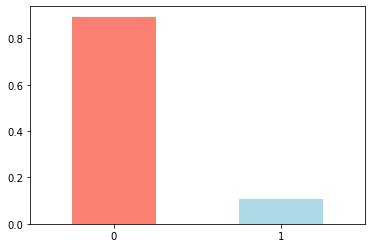

In [ ]:
df_shill_bidding.Class.value_counts(normalize=True).plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


#### We can see that more than 80% of the data belongs to bids considered normal and a little over 15% is considered as anomalous bidding.

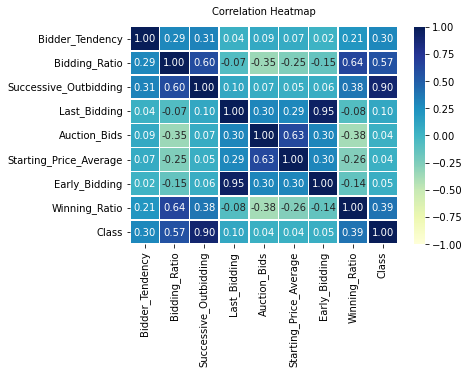

In [ ]:
correlation = df_shill_bidding.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".2f",linewidths=.5, vmin=-1, vmax=1, cmap= "YlGnBu")
plot.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

### We can see on the correlation graph above that Successive_Outbidding has a strong positive correlation with Class. That makes a lot of sense, because according to the dictionary, Successive outbidding happens when a shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments, which will probabaly bee seen as a anomalous conduct.

## Anomalous bidding according to the Successive outbidding

If you want to compare two columns to each other, you can use the function pd.crosstab(column_1, column_2).

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our Class column with the Successive outbidding column.

Remember from our data dictionary, for the Class column, 1 = Anomalous bidding, 0 = Normal bidding. And for Successive_Outbidding, I couldn´t find the legend for it, but I believe that 1 is when the bidder keeps outbidding himself continuosly and 0.5 and 0 is more like not doing so much outbid. That is what I infer from the crosstab below.

In [ ]:
pd.crosstab(df_shill_bidding["Class"], df_shill_bidding["Successive_Outbidding"])

Successive_Outbidding,0.0,0.5,1.0
Class,,,
0,5476,152,18
1,2,222,451


#### As we can see, it doesn´t look coincidence that the majority of Successive outbids that are considered as anomalous on the dataset falls into the 1.0 and 0.5 slot. While the bids that are considered normal holds a much less values of successive outbids. The connection is clear.

In [ ]:
normal_bids = df_shill_bidding[df_shill_bidding["Class"]==0]
anomalous_bids = df_shill_bidding[df_shill_bidding["Class"]==1]                              


### I decided to create these two subsets so we can see more clearly the difference between bids.

In [ ]:
print("Total amount of bids =", len(df_shill_bidding))
print("Number of bids considered as anomalous =", len(anomalous_bids))
print("Percentage of bids considered as anomalous =", (len(anomalous_bids)/ len(df_shill_bidding))*100)
print("Number of bids considered normal =", len(normal_bids))
print("Percentage of bids considered normal =", (len(normal_bids)/ len(df_shill_bidding))*100)

Total amount of bids = 6321
Number of bids considered as anomalous = 675
Percentage of bids considered as anomalous = 10.678690080683436
Number of bids considered normal = 5646
Percentage of bids considered normal = 89.32130991931656


In [ ]:
normal_bids.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
count,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.0
mean,0.122403,0.101775,0.016649,0.450286,0.227638,0.465605,0.423630,0.308242,0.0
std,0.177443,0.093187,0.098199,0.380862,0.255699,0.489642,0.381178,0.421624,0.0
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.024793,0.040000,0.000000,0.037324,0.000000,0.000000,0.022877,0.000000,0.0
50%,0.055556,0.071429,0.000000,0.410174,0.100000,0.000000,0.339707,0.000000,0.0
75%,0.142857,0.125000,0.000000,0.851196,0.454545,0.993593,0.823714,0.812500,0.0
max,1.000000,0.857143,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,0.0


In [ ]:
anomalous_bids.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0
mean,0.310979,0.344268,0.832593,0.570463,0.264797,0.533181,0.489674,0.865322,1.0
std,0.262102,0.192067,0.239259,0.356222,0.249207,0.488366,0.372559,0.143949,0.0
min,0.009063,0.070175,0.000000,0.000073,0.000000,0.000000,0.000002,0.000000,1.0
25%,0.104870,0.193548,0.500000,0.220891,0.000000,0.000000,0.077295,0.803226,1.0
50%,0.225806,0.294118,1.000000,0.664830,0.250000,0.961233,0.541917,0.884615,1.0
75%,0.458042,0.461538,1.000000,0.914694,0.470588,0.993593,0.858793,1.000000,1.0
max,1.000000,1.000000,1.000000,0.999820,0.788235,0.999935,0.999092,1.000000,1.0


#### We can absolutely see the difference on the means of the atributtes. The atributtes with Class 1, the bids considered anomalous, have a much higher mean in every single atributte, which denotes a pattern that we will find on the machine learning model. 

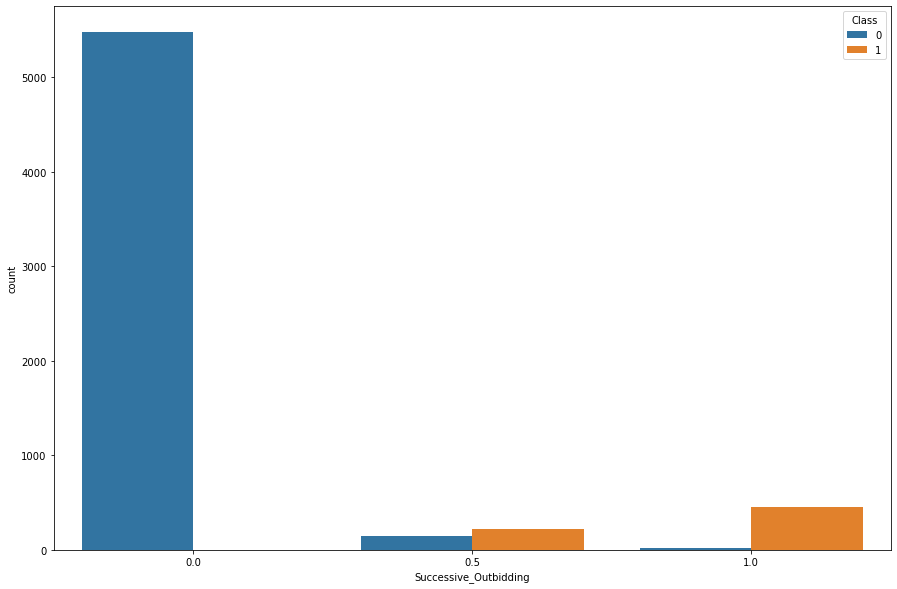

In [ ]:
plt.figure(figsize=[15,10])
sns.countplot(x= "Successive_Outbidding", hue = "Class", data=df_shill_bidding);

### One more graph to verify that the amount of Successive outbidding increases torwards to the anomalous behavior.

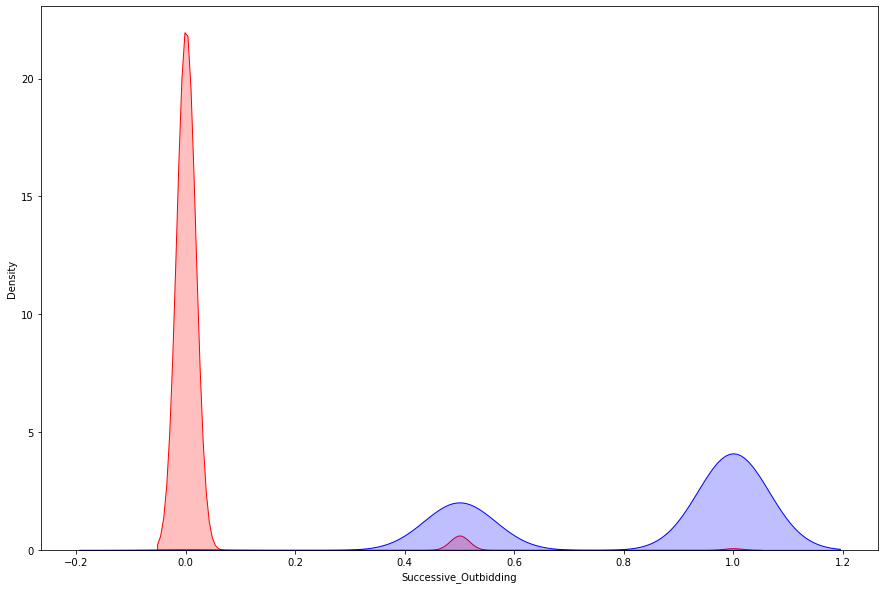

In [ ]:
plt.figure(figsize=[15,10])
sns.kdeplot(normal_bids["Successive_Outbidding"], label = "Normal Bidding", shade = True, color="r");
sns.kdeplot(anomalous_bids["Successive_Outbidding"], label = "Anomalous Bidding", shade = True, color="b");

### I believe we have formed a good intuition about this dataset doing this EDA. So now let´s start modeling!

## Modeling

#### So the problem we are trying to solve is to find out if we can classify using our machine learning skills if the bidding are shill bids or normal bids. 

But before we model, we have to get our dataset ready. Let´s have a look at it again.


In [ ]:
df_shill_bidding.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,0


We're trying to predict our target variable (Class) using all of the other variables.

To do this, we'll split the target variable from the rest.



In [ ]:
# Everything except target variable
X = df_shill_bidding.drop("Class", axis=1)

# Target variable
y = df_shill_bidding.Class.values

Let's see our new variables.

In [ ]:
# Independent variables (no target column)
X.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000


In [ ]:
# Targets
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where we'll split our data into a **training set** and a **test set**.

We use our training set to train our model and our test set to test it.

The test set must remain separate from our training set.

To split our data into a training and test set, we can use Scikit-Learn's train_test_split and feed it our independent and dependent variables (`X` & `y`). Let´s do it!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The test_size parameter is used to tell the train_test_split() function how much of our data we want in the test set.

It is common to use 80% of your data to train on and the other 20% to test on.

Let's look at our training data.

In [ ]:
X_train.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
1262,0.012346,0.045455,0.0,0.022039,0.181818,0.000000,0.022039,0.000000
308,0.028571,0.052632,0.0,0.874185,0.052632,0.000000,0.874185,0.000000
1962,0.555556,0.250000,0.0,0.281743,0.100000,0.000000,0.187318,0.666667
276,0.052632,0.166667,0.0,0.142917,0.000000,0.000000,0.142917,0.727273
2665,0.024793,0.096774,0.0,0.974437,0.419355,0.993528,0.974437,0.000000


In [ ]:
y_train, len(y_train)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 5056)

We can see we're using 5056 samples to train on. Let's look at our test data.

In [ ]:
X_test.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
3230,0.533333,0.571429,1.0,0.856200,0.000000,0.000000,0.855806,1.0
5108,0.090909,0.040000,0.0,0.829008,0.280000,0.993593,0.829008,0.0
2234,0.066667,0.027778,0.0,0.937697,0.500000,0.935605,0.937697,0.0
4095,0.008696,0.047619,0.0,0.271312,0.142857,0.935346,0.271312,0.0
1955,0.076923,0.033333,0.0,0.968549,0.400000,0.993593,0.968549,0.0


In [ ]:
y_test, len(y_test)

(array([1, 0, 0, ..., 0, 0, 0], dtype=int64), 1265)

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - LogisticRegression()
2. RandomForest - RandomForestClassifier()
3. Neural Network - RandomForestClassifier()

#### Why these?

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

#### I will be implementing the models one by one for better visualization. 
#### So let´s go to the implementation of the Logistic Regression model using an library from sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression()

The training is done and know we can make some prediction on the test dataset

In [ ]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Now we can check the accuracy of our prediction above between the predict values and the real values

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9683794466403162

### We have reached an accuracy of approximatelly 98%. Pretty good.

That means that every time we try to classify if the bid is a shill bidding or a normal one, we have 98% chance to classify correctly the type of bid.
But we still need to analyze other metrics like precision and recall to really make sure we are making the right predictions.

Fot that to be done, we are going to need to import a confusion matrix that will give us these other metrics.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[1101,   18],
       [  22,  124]], dtype=int64)

#### We have on the first line of the array the class 0 and on the second line the class 1. For better visualizaton I will deploy a graph using heatmap from seaborn

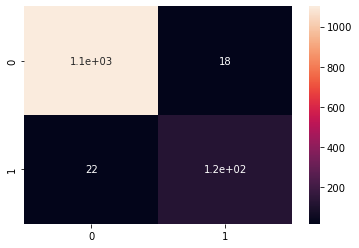

In [ ]:
sns.heatmap(cm, annot=True);

#### So we can see that our algorithm classified 17 bids as normal, when in fact they were shill bids, and 9 as shill bids when actually they were normal bids. In the other hand, it predicted very well the amount of normal bids and shill bids.

#### So now let´s check the precision and recall of this model also using sklearn

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
precision_score(y_test, y_pred)

0.8732394366197183

In [ ]:
recall_score(y_test, y_pred)

0.8493150684931506

In [ ]:
f1_score(y_test, y_pred, average="macro")

0.9216349489543068

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1119
           1       0.87      0.85      0.86       146

    accuracy                           0.97      1265
   macro avg       0.93      0.92      0.92      1265
weighted avg       0.97      0.97      0.97      1265

